<a href="https://colab.research.google.com/github/nandhukumar86/AIML-Practice/blob/master/Project5_concrete_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Imports

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


In [132]:
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/concrete.csv')


In [80]:
raw_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [81]:
all_columns = raw_data.columns
all_columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

# Univariate Analysis

In [82]:
raw_data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

Observations:
1. All variables are float except age.

In [83]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


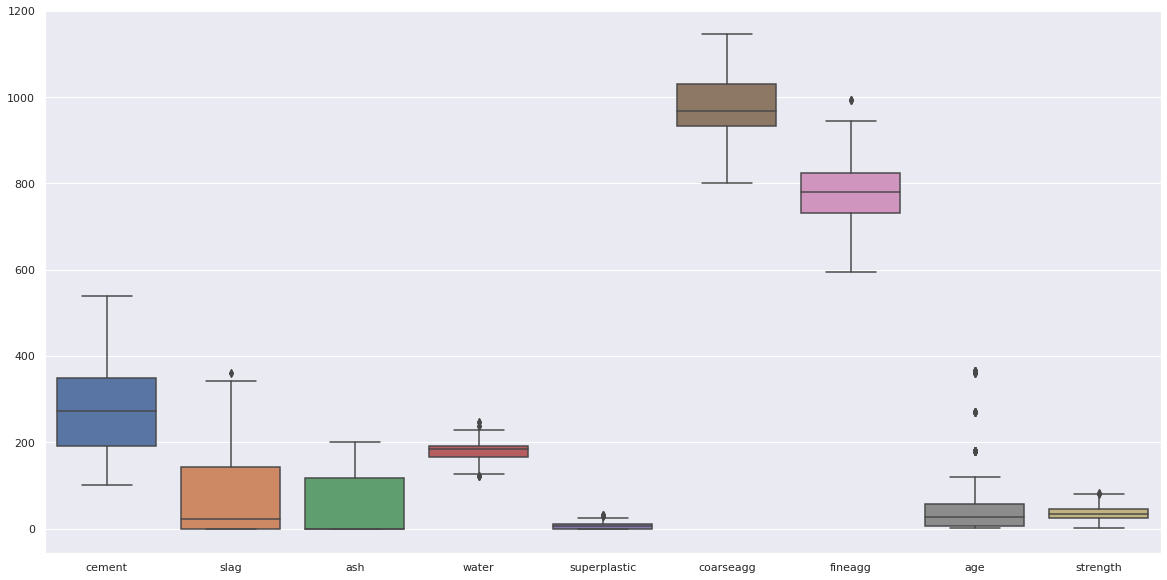

In [84]:
plt.figure(figsize=(20,10))
sns.boxplot(data=raw_data)

Domain understanding:
1. Concrete is made of Cement + Water + aggregates, all others can be optional and combinatorial.
2. Aggreagates can be any of the coarse aggregate or fine aggregate
3. Inclusion of slag to increase strength, reduce permeability, improve resistance to chemical attack and inhibit rebar corrosion.
4. Ash acts as an alternate to Cement but cannot be replaced completely.

Outcome of Boxplot
1. Outliers in Slag, Water, Superplastic, Age, FineAgg
2. Cement, Water, Aggregates are essential things - which are non zeros in the box plot.
3. For Ash - Q1 and Q2 are same and zero.

In [85]:
raw_data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

No missing values

There are zero values in Slag, Ash and Superplastic - As per the domain the strenght is tested with this presence of their various combinations. 

Hence Having zero values is not an issue.

# Multivariate Analysis

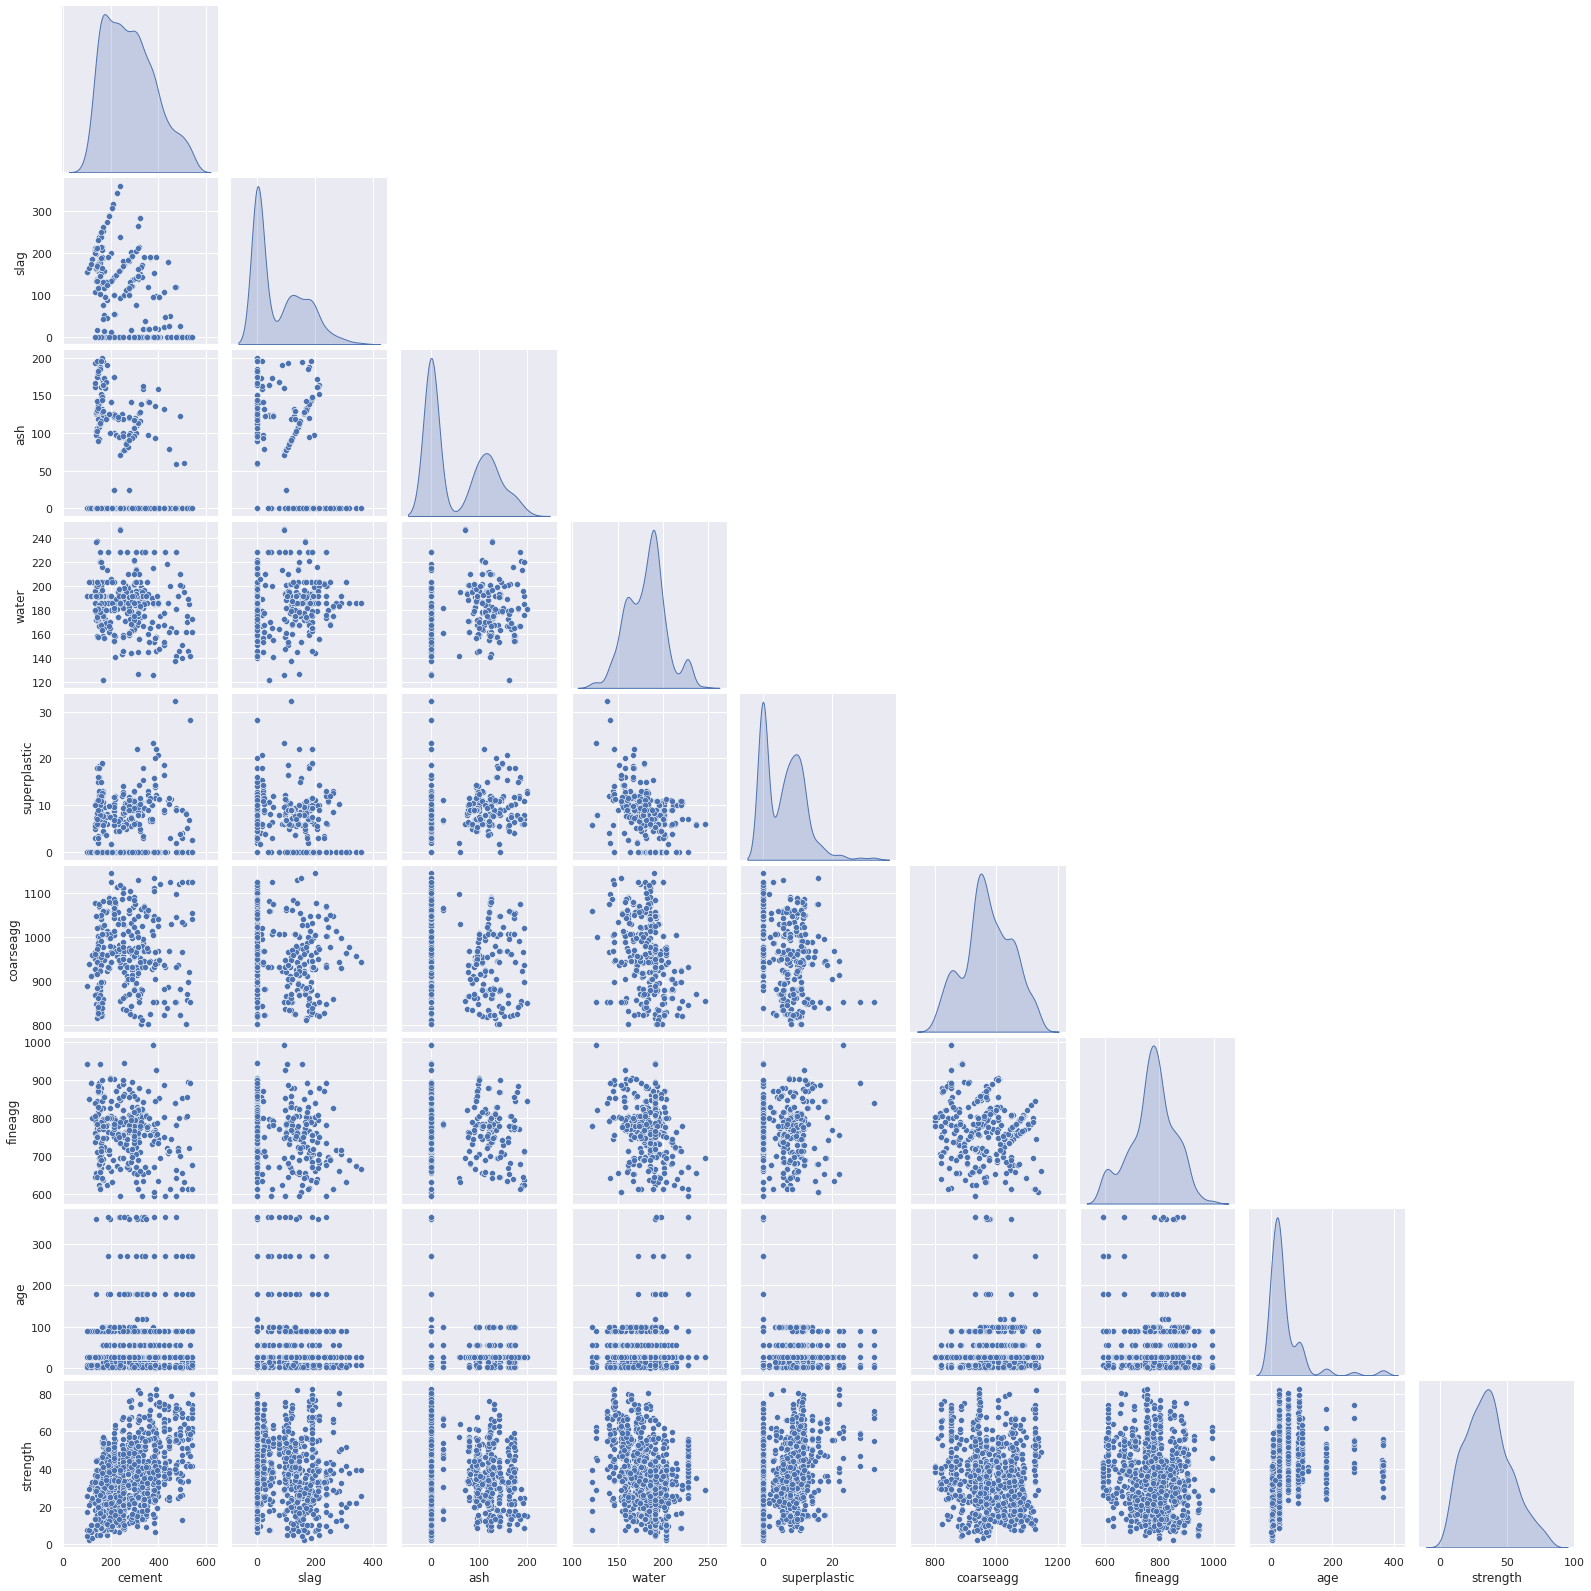

In [86]:
sns.pairplot(raw_data, corner=True, diag_kind='kde')

In [87]:
from scipy.stats import kurtosis, skew

for col in raw_data.columns:
  print(col ,'\n  Skewness: ', np.round(skew(raw_data[col]),3),': Kurtosis: ', np.round(kurtosis(raw_data[col]),3))

cement 
  Skewness:  0.509 : Kurtosis:  -0.524
slag 
  Skewness:  0.8 : Kurtosis:  -0.512
ash 
  Skewness:  0.537 : Kurtosis:  -1.328
water 
  Skewness:  0.075 : Kurtosis:  0.116
superplastic 
  Skewness:  0.906 : Kurtosis:  1.399
coarseagg 
  Skewness:  -0.04 : Kurtosis:  -0.602
fineagg 
  Skewness:  -0.253 : Kurtosis:  -0.108
age 
  Skewness:  3.264 : Kurtosis:  12.104
strength 
  Skewness:  0.416 : Kurtosis:  -0.318


Observations:
1. Cement, water, Aggregates, Strenght are near to normal distribution
2. Ash, Slag and Age is skewed because of zero values
3. There are clusters are also available in the kde plot of pair plot.

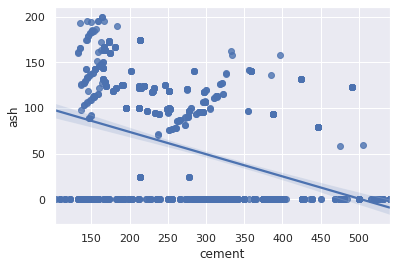

In [88]:
sns.regplot(x = 'cement', y = 'ash', data = raw_data)

Observation:
1. In the industry - ash sometimes used as alternate to cement, but not completely , it is evident in graph that when the cement is not used much ash has been used as alternate.

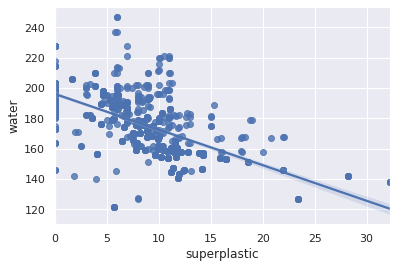

In [89]:
sns.regplot(x = 'superplastic', y = 'water', data = raw_data)

Observation:
1. In the industry - super plastic has been used to reduce the usage of water in concrete manufacturing. The above graph shows that increase in super plastic reduced the amount of water usage in concrete.

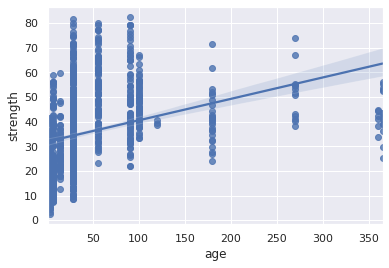

In [90]:
sns.regplot(x="age", y="strength", data=raw_data)

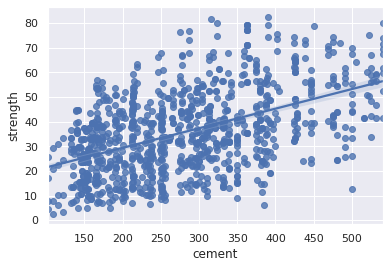

In [91]:
sns.regplot(x = 'cement', y = 'strength', data = raw_data)

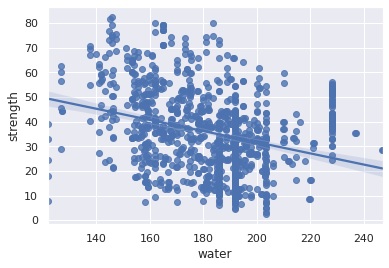

In [92]:
sns.regplot(x = 'water', y = 'strength', data = raw_data)

Observation:
1. Strength increases when we add more cement.
2. Strength decreases when we add more water to concrete. This dilutes the stength. 

# Handling of Missing values and Feature selection.

There are no missing values, but it has zero values. I choose not to fill the zero values reason being the industry is testing with different combinations of componenets. 
Removing an attribute and filling zeros will not justify the strength. 

In [93]:
from sklearn.linear_model import LassoCV

model = LassoCV()

cols = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']

model.fit(raw_data[cols], raw_data['strength'])

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [94]:
model.coef_

array([ 0.11851723,  0.1021952 ,  0.08704694, -0.16523315,  0.23370139,
        0.01480559,  0.01774597,  0.11381332])

Observation:
1. When using LassoCV for feature selection - there were no features with zero coefficients. This shows that all attributes are important.

In [95]:
corr_matrix = raw_data[cols].corr()            
upper = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
high_correlation_features = [column for column in upper.columns if any(upper[column] > 0.8)]


In [96]:
high_correlation_features

[]

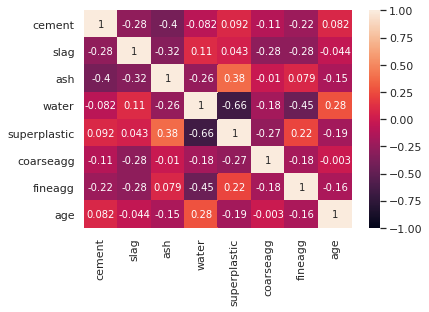

In [97]:
sns.heatmap(corr_matrix, annot=True, vmin = -1, vmax = 1)

Observation:
1. Heat map also shows that no highly correlated features available in the data, considering mod(0.8)

# Outlier detection

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


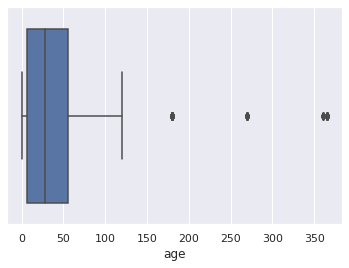

In [98]:
sns.boxplot(raw_data['age'])

In [99]:
raw_data.shape

(1030, 9)

In [100]:
raw_data[raw_data.age > 150].shape

(59, 9)

Observation:
1. I will be considering Age for the outlier removal, as the stocks kept for long time may not be useful to test the strength, due to climatic changes. Hence removing the data points whose age is more than 150 days.
2. Droppping feature is not possible as dscussed in feature selection

In [133]:
raw_data = raw_data[raw_data.age <= 150]

Composite Features:
1. Cement/slag/Ash - Same purpose and used interchangeabe in the industry
2. water/superplastic - can be used interchangeable in the industry.
3. coarseagg/fineagg - both are aggregates.

We are not going to create composite features as 

1. cement_pc = cement /(cement + slag + ash)
2. slag_pc = slag /(cement + slag + ash)
3. ash_pc = ash/(cement + slag + ash)

similarly we can do this for (water+superplastic) and (coarseagg+fineagg)

But this is useless, when we do standardization - the data would be recurrent as in source variables.

#Model complexity

Assuming the model complexity as linear as of now, but during the pipeline build we wil keep the dimention of the complexity as 3. And based on tuning we will get the best out of it.

# Gaussian Explorations

Pairplot shows there are mix of gausians available in variables like Slag, Ash, Water, Super plastic. Let us try to group then together for further investigation.

In [135]:
raw_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [152]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for i in range(2,10):
  model = KMeans(n_clusters=i, random_state=1, init='k-means++' )
  model.fit(raw_data)
  print(i, silhouette_score(raw_data, model.labels_))


2 0.23565186023149734
3 0.26165747509584436
4 0.2660817572008138
5 0.26914845774106216
6 0.267811011079477
7 0.2675994593778667
8 0.28455891225669194
9 0.3011271944801156


There is a sharp jump from 2nd to 3rd cluster, and also from 7th to 8th cluster.

In [153]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=10)
cluster_labels = model.fit_predict(raw_data)


In [155]:
raw_data['3_cluster'] = cluster_labels

In [165]:
raw_data.groupby(['3_cluster'])['cement','ash','slag','water','superplastic','coarseagg','fineagg','age','strength'].mean()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cement,ash,slag,water,superplastic,coarseagg,fineagg,age,strength
3_cluster,,,,,,,,,
0,398.224837,29.941830,30.420915,179.206536,6.955556,955.639542,769.797386,30.911765,41.551667
1,221.850152,105.545593,11.978723,172.858359,7.263526,1019.833739,812.821581,36.258359,29.667508
2,223.712798,35.497917,176.660119,187.112202,5.573512,942.865179,750.478571,30.309524,35.153452


Observations:
1. Considering the strength column - Cluster 0 has high strength which has more proportion on Cement. Cluster 2 has mediem strenth that has reduction in cement but increase in slag. Cluster 1 has the lowest strength because mmore of Ash has been included.

1. Cluster 0 - High Strength
2. Cluster 1 - Low Strength
3. Cluster 2 - Medium strength

# Algorithms which we can consider.

1. Lasso Regressor
2. Ridge Regressor
3. KMeans Regressor
4. SVM Regressor
5. Extra Trees Regressor

## Train Test split

In [166]:
raw_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,3_cluster
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,2
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,2
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,2


In [167]:
raw_data.drop(columns= ['3_cluster'], inplace=True)

In [168]:
y = raw_data.pop('strength')
X = raw_data

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)


## Linear Regression

In [283]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pl = Pipeline([
               ('poly', PolynomialFeatures()),
               ('standardTransformer',StandardScaler()), 
               ('model', LinearRegression())
               ])

from sklearn.model_selection import GridSearchCV 

space = dict()
space['poly__degree'] = [1,2,3]
space['poly__interaction_only'] = [True, False]

model = GridSearchCV(pl, param_grid = space, cv = 5)

model.fit(X_train, y_train);

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))
print('CV Score: ',model.best_score_)
print('Test Score: ', model.score(X_test, y_test))

model.best_estimator_

Training Score:  0.953933228147604
CV Score:  0.8490818186264724
Test Score:  0.8155207142203903


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardTransformer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

## Lasso

In [284]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pl = Pipeline([
               ('poly', PolynomialFeatures()),
               ('standardTransformer',StandardScaler()), 
               ('model', Lasso())
               ])

from sklearn.model_selection import GridSearchCV 

space = dict()
space['poly__degree'] = [1,2,3]
space['poly__interaction_only'] = [True, False]
space['model__alpha'] = [0.65, 0.75,0.85]

model = GridSearchCV(pl, param_grid = space, cv = 5)

model.fit(X_train, y_train);

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))
print('CV Score: ',model.best_score_)
print('Test Score: ', model.score(X_test, y_test))

model.best_estimator_

Training Score:  0.7767893520521703
CV Score:  0.7569228315087069
Test Score:  0.8011186338455153


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardTransformer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 Lasso(alpha=0.65, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

##Ridge

In [285]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pl = Pipeline([
               ('poly', PolynomialFeatures()),
               ('standardTransformer',StandardScaler()),
               ('model', Ridge())
               ])

from sklearn.model_selection import GridSearchCV 

space = dict()
space['poly__degree'] = [1,2,3]
space['poly__interaction_only'] = [True, False]
space['model__alpha'] = [0, 0.1, 0.15]

model = GridSearchCV(pl, param_grid = space, cv = 5)

model.fit(X_train, y_train);

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))
print('CV Score: ',model.best_score_)
print('Test Score: ', model.score(X_test, y_test))

model.best_estimator_

Training Score:  0.9313719328742692
CV Score:  0.87607444241305
Test Score:  0.8624102448226305


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardTransformer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 Ridge(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

## Extra Tree Regressor

In [286]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor


pl = Pipeline([
               ('poly', PolynomialFeatures()),
               ('standardTransformer',StandardScaler()), 
               ('model', ExtraTreesRegressor())
               ])

from sklearn.model_selection import GridSearchCV 

space = dict()
space['poly__degree'] = [1,2,3]
space['poly__interaction_only'] = [True, False]

model = GridSearchCV(pl, param_grid = space, cv = 5)

model.fit(X_train, y_train);

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))
print('CV Score: ',model.best_score_)
print('Test Score: ', model.score(X_test, y_test))

model.best_estimator_


Training Score:  0.9989454217765911
CV Score:  0.8977466326651298
Test Score:  0.9148962939053957


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardTransformer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                     criterion='mse', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_

## KNN Regressor

In [287]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor


pl = Pipeline([
               ('poly', PolynomialFeatures()),
               ('standardTransformer',StandardScaler()), 
               ('model', KNeighborsRegressor())
               ])

from sklearn.model_selection import GridSearchCV 

space = dict()
space['poly__degree'] = [1,2,3]
space['poly__interaction_only'] = [True, False]
space['model__n_neighbors'] = [3,5,7,9,11,13]
space['model__weights'] = ['uniform', 'distance']
space['model__p']=[1,2]


model = GridSearchCV(pl, param_grid = space, cv = 5)

model.fit(X_train, y_train);

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))
print('CV Score: ',model.best_score_)
print('Test Score: ', model.score(X_test, y_test))

model.best_estimator_


Training Score:  0.9989454217765911
CV Score:  0.8333187379313189
Test Score:  0.8600089844642468


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=True, order='C')),
                ('standardTransformer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=5, p=1,
                                     weights='distance'))],
         verbose=False)

## CatBoost Regressor

In [261]:
!pip install catboost

     |████████████████████████████████| 66.3MB 52kB/s 


In [288]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor


pl = Pipeline([
              #  ('poly', PolynomialFeatures()),
               ('powerTransformer',PowerTransformer()), # convert the data into gaussian, as gaussian models performs better!!
               ('model', CatBoostRegressor(verbose=False))
               ])

from sklearn.model_selection import GridSearchCV 

space = dict()
# space['poly__degree'] = [1,2,3]
# space['poly__interaction_only'] = [True, False]


model = GridSearchCV(pl, param_grid = space, cv = 5)

model.fit(X_train, y_train);

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))
print('CV Score: ',model.best_score_)
print('Test Score: ', model.score(X_test, y_test))

model.best_estimator_


Training Score:  0.9912882411032178
CV Score:  0.931350953346012
Test Score:  0.9302542545937726


Pipeline(memory=None,
         steps=[('powerTransformer',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f2abc511780>)],
         verbose=False)

## Gradient Boost


In [289]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor


pl = Pipeline([
              #  ('poly', PolynomialFeatures()),
               ('powerTransformer',PowerTransformer()), # convert the data into gaussian, as gaussian models performs better!!
               ('model', GradientBoostingRegressor())
               ])

from sklearn.model_selection import GridSearchCV 

space = dict()
# space['poly__degree'] = [1,2,3]
# space['poly__interaction_only'] = [True, False]


model = GridSearchCV(pl, param_grid = space, cv = 5)

model.fit(X_train, y_train);

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))
print('CV Score: ',model.best_score_)
print('Test Score: ', model.score(X_test, y_test))

model.best_estimator_



Training Score:  0.9564001358649032
CV Score:  0.8986683764518502
Test Score:  0.888038788799314


Pipeline(memory=None,
         steps=[('powerTransformer',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('model',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                  

## XGBoost Regressor

In [268]:
!pip install xgboost

In [290]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


pl = Pipeline([
              #  ('poly', PolynomialFeatures()),
               ('powerTransformer',PowerTransformer()), # convert the data into gaussian, as gaussian models performs better!!
               ('model', XGBRegressor())
               ])

from sklearn.model_selection import GridSearchCV 

space = dict()
# space['poly__degree'] = [1,2,3]
# space['poly__interaction_only'] = [True, False]


model = GridSearchCV(pl, param_grid = space, cv = 5)

model.fit(X_train, y_train);

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))
print('CV Score: ',model.best_score_)
print('Test Score: ', model.score(X_test, y_test))

model.best_estimator_



[11:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:20:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Score:  0.9538472236025031
CV Score:  0.8929898324495877
Test Score:  0.8928279922832212


Pipeline(memory=None,
         steps=[('powerTransformer',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1))],
         verbose=False)

## SVM Regressor

In [292]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR


pl = Pipeline([
              #  ('poly', PolynomialFeatures()),
               ('powerTransformer',PowerTransformer()), # convert the data into gaussian, as gaussian models performs better!!
               ('model', SVR())
               ])

from sklearn.model_selection import GridSearchCV 

space = dict()
space['model__C'] = [1,100, 1000]
space['model__kernel'] = ['linear','poly','rbf']


model = GridSearchCV(pl, param_grid = space, cv = 5)

model.fit(X_train, y_train);

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))
print('CV Score: ',model.best_score_)
print('Test Score: ', model.score(X_test, y_test))

model.best_estimator_



Training Score:  0.9611865000683578
CV Score:  0.882093678454224
Test Score:  0.9013092566475222


Pipeline(memory=None,
         steps=[('powerTransformer',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('model',
                 SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

#Conclusion

Out of above algorithms, **Catboost Regressor** performs better. With **Cross validation score of 93%**, **Training Score of 99%** [because of tree model], **Testing Score of 93%**

In [299]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor


pl = Pipeline([
              #  ('poly', PolynomialFeatures()),
               ('powerTransformer',PowerTransformer()), # convert the data into gaussian, as gaussian models performs better!!
               ('model', CatBoostRegressor(verbose=False))
               ])

from sklearn.model_selection import GridSearchCV 

space = dict()
# space['poly__degree'] = [2]
# space['poly__interaction_only'] = [True, False]


model = GridSearchCV(pl, param_grid = space, cv = 5)

model.fit(X_train, y_train);

y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('Training Score: ', model.score(X_train, y_train))
print('CV Score: ',model.best_score_)
print('Test Score: ', model.score(X_test, y_test))

model.best_estimator_


Training Score:  0.9912882411032178
CV Score:  0.931350953346012
Test Score:  0.9302542545937726


Pipeline(memory=None,
         steps=[('powerTransformer',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f2abbc7acc0>)],
         verbose=False)